In [17]:
import pandas as pd
# Reloading the dataset and data dictionary using the correct paths
leads_data = pd.read_csv('C:/Users/uttam/Downloads/Lead+Scoring+Case+Study/Leads.csv')
data_dictionary = pd.read_excel('C:/Users/uttam/Downloads/Lead+Scoring+Case+Study/Leads Data Dictionary.xlsx')

# Displaying first few rows of the leads data to inspect the structure
leads_head = leads_data.head()

# Checking for missing values and data types in the dataset
missing_values = leads_data.isnull().sum()
data_types = leads_data.dtypes

# Inspecting the data dictionary
data_dict_head = data_dictionary.head()

leads_head, missing_values, data_types, data_dict_head

(                            Prospect ID  Lead Number              Lead Origin  \
 0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
 1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
 2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
 3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
 4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
 
       Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
 0      Olark Chat           No          No          0          0.0   
 1  Organic Search           No          No          0          5.0   
 2  Direct Traffic           No          No          1          2.0   
 3  Direct Traffic           No          No          0          1.0   
 4          Google           No          No          1          2.0   
 
    Total Time Spent on Website  Page Views Per Visit  ...  \
 0              

In [19]:
# Treating "Select" as missing in categorical variables
leads_data = leads_data.replace('Select', None)

# Handling missing values
# Drop columns with a large percentage of missing values (threshold: 40% or more)
missing_threshold = 0.4
columns_to_drop = leads_data.columns[leads_data.isnull().mean() > missing_threshold]
leads_data = leads_data.drop(columns=columns_to_drop)

# Impute missing values in remaining columns
# For numerical columns, use median imputation
numerical_cols = leads_data.select_dtypes(include=['float64', 'int64']).columns
leads_data[numerical_cols] = leads_data[numerical_cols].fillna(leads_data[numerical_cols].median())

# For categorical columns, use mode imputation
categorical_cols = leads_data.select_dtypes(include=['object']).columns
leads_data[categorical_cols] = leads_data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Encoding categorical variables using one-hot encoding
leads_data_encoded = pd.get_dummies(leads_data, drop_first=True)

# Normalizing numerical variables
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
leads_data_encoded[numerical_cols] = scaler.fit_transform(leads_data_encoded[numerical_cols])

# Checking the processed data
processed_data_summary = {
    "Remaining Columns": leads_data_encoded.columns,
    "Shape": leads_data_encoded.shape,
    "Sample Data": leads_data_encoded.head(),
}
processed_data_summary

{'Remaining Columns': Index(['Lead Number', 'Converted', 'TotalVisits',
        'Total Time Spent on Website', 'Page Views Per Visit',
        'Prospect ID_0006d10a-eb01-4ba9-92e2-ad78588b2a40',
        'Prospect ID_0011be30-fa97-465b-8e44-0ae83dff7eed',
        'Prospect ID_0011f23e-9fd9-4256-b316-efc2e2639b0d',
        'Prospect ID_001b0ad3-9096-4af8-8205-912f5c6dafd8',
        'Prospect ID_001e6e14-2183-47ab-a405-108e44bc2e66',
        ...
        'Last Notable Activity_Form Submitted on Website',
        'Last Notable Activity_Had a Phone Conversation',
        'Last Notable Activity_Modified',
        'Last Notable Activity_Olark Chat Conversation',
        'Last Notable Activity_Page Visited on Website',
        'Last Notable Activity_Resubscribed to emails',
        'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
        'Last Notable Activity_Unsubscribed',
        'Last Notable Activity_View in browser link Clicked'],
       dtype='object', length=9399),

C:\Users\uttam\AppData\Local\Temp\ipykernel_3168\2051144262.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Converted', data=leads_data, palette="viridis")


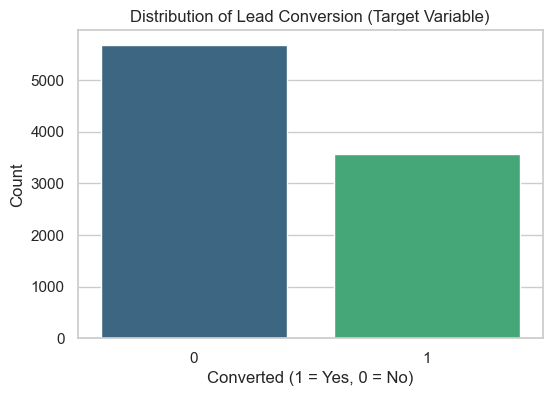

C:\Users\uttam\AppData\Local\Temp\ipykernel_3168\2051144262.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_source.index, y=conversion_by_source.values, palette="coolwarm")


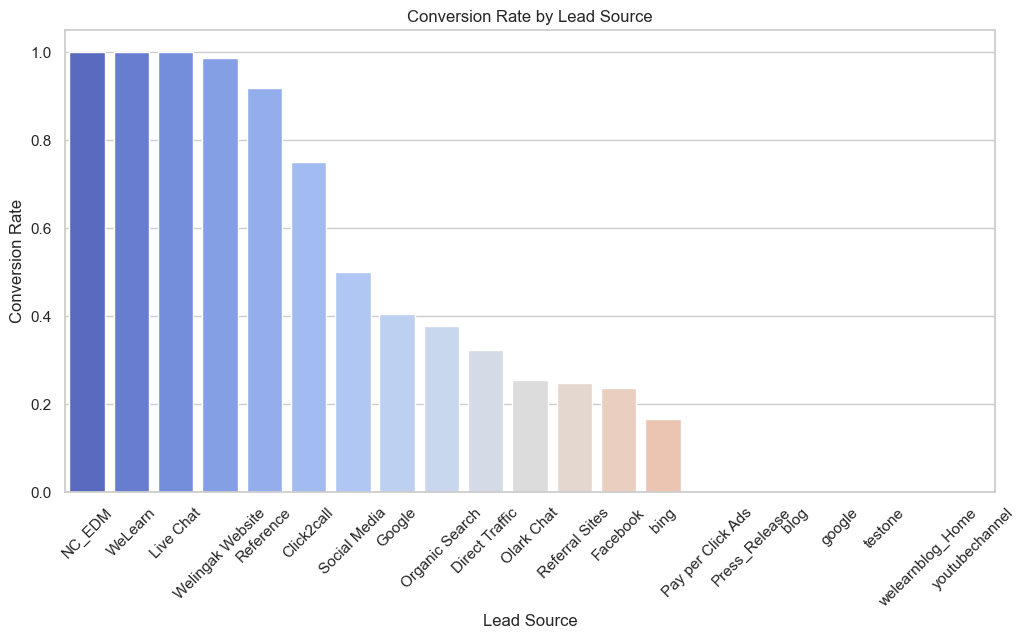

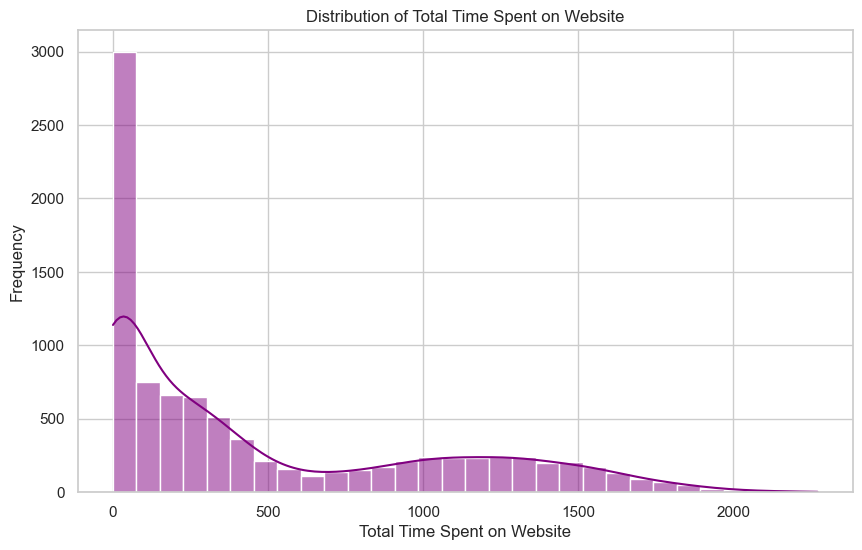

C:\Users\uttam\AppData\Local\Temp\ipykernel_3168\2051144262.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_time_spent = leads_data.groupby('Time_Spent_Binned')['Converted'].mean()
C:\Users\uttam\AppData\Local\Temp\ipykernel_3168\2051144262.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_time_spent.index.astype(str), y=conversion_by_time_spent.values, palette="Blues")


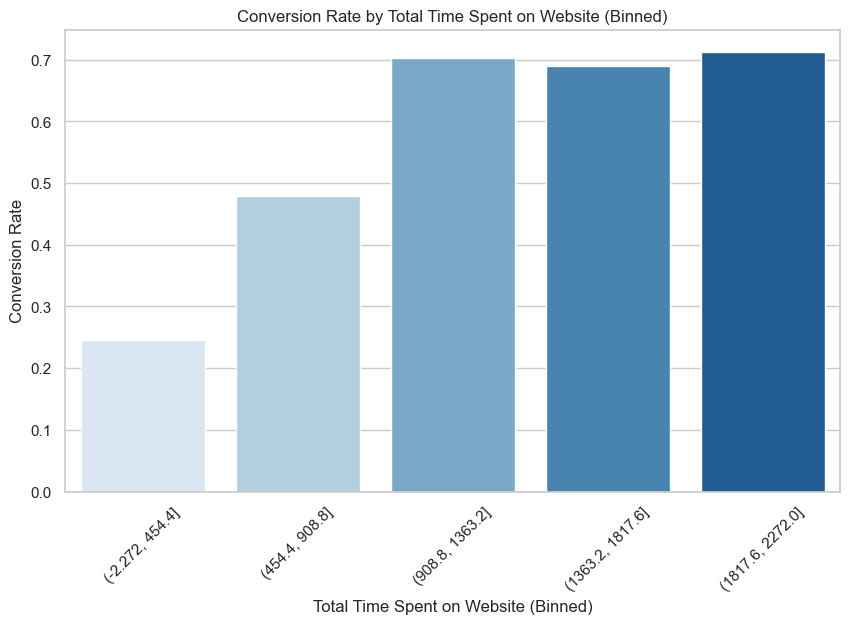

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plot style
sns.set(style="whitegrid")

# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Converted', data=leads_data, palette="viridis")
plt.title("Distribution of Lead Conversion (Target Variable)")
plt.xlabel("Converted (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Conversion rate by Lead Source
plt.figure(figsize=(12, 6))
conversion_by_source = leads_data.groupby('Lead Source')['Converted'].mean().sort_values(ascending=False)
sns.barplot(x=conversion_by_source.index, y=conversion_by_source.values, palette="coolwarm")
plt.title("Conversion Rate by Lead Source")
plt.xlabel("Lead Source")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

# Distribution of Total Time Spent on Website
plt.figure(figsize=(10, 6))
sns.histplot(leads_data['Total Time Spent on Website'], kde=True, color='purple', bins=30)
plt.title("Distribution of Total Time Spent on Website")
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Frequency")
plt.show()

# Conversion rate by Total Time Spent on Website (binned)
leads_data['Time_Spent_Binned'] = pd.cut(leads_data['Total Time Spent on Website'], bins=5)
conversion_by_time_spent = leads_data.groupby('Time_Spent_Binned')['Converted'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=conversion_by_time_spent.index.astype(str), y=conversion_by_time_spent.values, palette="Blues")
plt.title("Conversion Rate by Total Time Spent on Website (Binned)")
plt.xlabel("Total Time Spent on Website (Binned)")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()


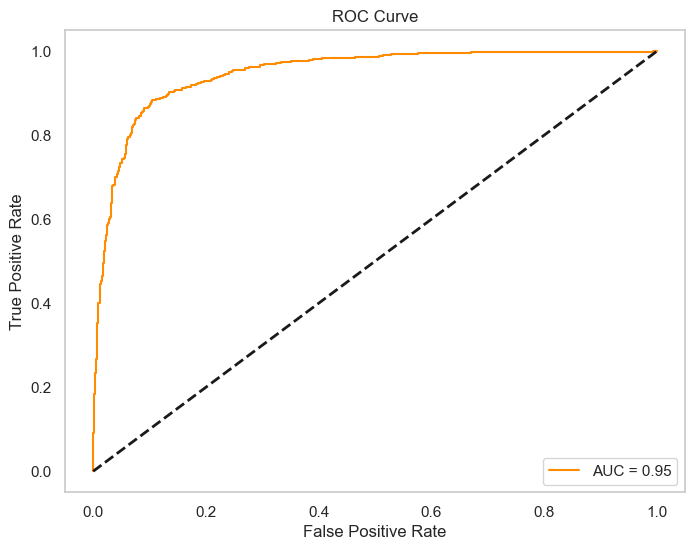

{'Accuracy': 0.8906926406926406,
 'Precision': 0.8706395348837209,
 'Recall': 0.8412921348314607,
 'F1-Score': 0.8557142857142858,
 'AUC-ROC': 0.947694947776547}

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Splitting the dataset into features (X) and target (y)
X = leads_data_encoded.drop('Converted', axis=1)
y = leads_data_encoded['Converted']

# Splitting into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Building the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Displaying evaluation metrics
model_metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC-ROC": roc_auc,
}

model_metrics

In [25]:
# Removing low-variance features (threshold for variance: 0.01)
from sklearn.feature_selection import VarianceThreshold

# Initialize variance threshold selector
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

# Checking the reduced dimensions
X_reduced_shape = X_reduced.shape

# Splitting the reduced dataset into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# Re-training the logistic regression model with reduced data
logreg_reduced = LogisticRegression(max_iter=1000, random_state=42)
logreg_reduced.fit(X_train_reduced, y_train)

# Predicting probabilities on the test set
y_pred_proba_reduced = logreg_reduced.predict_proba(X_test_reduced)[:, 1]

# Scaling probabilities to lead scores (0-100)
lead_scores = (y_pred_proba_reduced * 100).round(2)

X_reduced_shape, lead_scores[:10]  # Returning the reduced shape and a sample of lead scores


((9240, 59),
 array([71.75, 26.11,  5.19,  0.16,  0.14,  3.64, 72.14,  6.59, 28.44,
        16.58]))

In [27]:
from sklearn.metrics import precision_recall_curve

# Step 1: Adjust Classification Threshold

# Compute precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_reduced)

# Find the threshold where the precision (conversion rate) is closest to 80%
target_conversion_rate = 0.8
optimal_idx = (abs(precision - target_conversion_rate)).argmin()
optimal_threshold = thresholds[optimal_idx]

# Generate new predictions using the optimal threshold
y_pred_optimized = (y_pred_proba_reduced >= optimal_threshold).astype(int)

# Evaluate metrics at the new threshold
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_precision = precision_score(y_test, y_pred_optimized)
optimized_recall = recall_score(y_test, y_pred_optimized)
optimized_f1 = f1_score(y_test, y_pred_optimized)

# Step 2: Apply Regularization

# Perform logistic regression with L1 regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
logreg_l1.fit(X_train_reduced, y_train)
y_pred_proba_l1 = logreg_l1.predict_proba(X_test_reduced)[:, 1]

# Evaluate AUC for L1-regularized model
roc_auc_l1 = roc_auc_score(y_test, y_pred_proba_l1)

# Summary of results
optimization_results = {
    "Optimal Threshold": optimal_threshold,
    "Accuracy (Optimized)": optimized_accuracy,
    "Precision (Optimized)": optimized_precision,
    "Recall (Optimized)": optimized_recall,
    "F1-Score (Optimized)": optimized_f1,
    "AUC-ROC (L1 Regularized)": roc_auc_l1,
}

optimization_results

{'Optimal Threshold': 0.3072442251075744,
 'Accuracy (Optimized)': 0.8755411255411255,
 'Precision (Optimized)': 0.7997512437810945,
 'Recall (Optimized)': 0.9030898876404494,
 'F1-Score (Optimized)': 0.8482849604221636,
 'AUC-ROC (L1 Regularized)': 0.9493899845703434}